In [562]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 가까운 병원찾기

In [563]:
df = pd.read_csv('./hos/1. 병원정보서비스 2021.12.csv', encoding='CP949')
df.head()

,암호화요양기호,요양기관명,종별코드,종별코드명,시도코드,시도코드명,시군구코드,시군구코드명,읍면동,우편번호,...,치과일반의 인원수,치과인턴 인원수,치과레지던트 인원수,치과전문의 인원수,한방일반의 인원수,한방인턴 인원수,한방레지던트 인원수,한방전문의 인원수,x좌표,y좌표
0,JDQ4MTYyMiM4MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,경북대학교병원,1,상급종합,230000,대구,230006,대구중구,NaN,41944,...,0,0,0,1,0,0,0,0,128.604125,35.866774
1,JDQ4MTYyMiM4MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,계명대학교동산병원,1,상급종합,230000,대구,230007,대구달서구,신당동,42601,...,3,0,0,2,0,0,0,0,128.480131,35.853886
2,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,경희대학교병원,1,상급종합,110000,서울,110007,동대문구,NaN,2447,...,0,0,0,0,0,0,0,0,127.051852,37.594119
3,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,한양대학교병원,1,상급종합,110000,서울,110011,성동구,NaN,4763,...,0,2,4,7,0,0,0,0,127.044134,37.559657
4,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,학교법인 고려중앙학원 고려대학교의과대학부속병원(안암병원),1,상급종합,110000,서울,110012,성북구,NaN,2841,...,0,4,10,8,0,0,0,0,127.026354,37.587016


In [526]:
# df.info()

In [527]:
# df.isnull().sum()

In [564]:
df = df[df['x좌표'].notnull()]
# df.head()

In [565]:
# 위치 따오기
from haversine import haversine
from geopy.geocoders import Nominatim
geo_local = Nominatim(user_agent='South Korea')
def geocoding(address):
    geo = geo_local.geocode(address)
    x_y = [geo.latitude, geo.longitude]
    return x_y

In [566]:
address = input('위치를 입력하세요 : ')
x_y = geocoding(address)

In [567]:
latitude = x_y[0]
longitude = x_y[1]

In [568]:
distanceList = []
for i in range(0, len(df)):
    distanceList.append(haversine((latitude, longitude), (df.iloc[i]['y좌표'], df.iloc[i]['x좌표']), unit='km'))
# distanceList
df['distance'] = distanceList

In [569]:
sorted_df = df.sort_values(by='distance')   # 가까운 순서대로 정렬된 데이터 프레임. 모든 진료 과목이 담겨 있음.
sorted_df.head()

,암호화요양기호,요양기관명,종별코드,종별코드명,시도코드,시도코드명,시군구코드,시군구코드명,읍면동,우편번호,...,치과인턴 인원수,치과레지던트 인원수,치과전문의 인원수,한방일반의 인원수,한방인턴 인원수,한방레지던트 인원수,한방전문의 인원수,x좌표,y좌표,distance
13796,JDQ4MTg4MSM1MSMkMiMkMCMkMDAkNDgxNzAyIzQxIyQxIy...,항미소외과의원,31,의원,110000,서울,110010,서대문구,NaN,3787,...,0,0,0,0,0,0,0,126.933188,37.556736,0.193475
42538,JDQ4MTg4MSM1MSMkMSMkMCMkNzIkNDgxMzUxIzMxIyQxIy...,서울바른이치과교정과치과의원,51,치과의원,110000,서울,110010,서대문구,NaN,3787,...,0,0,1,0,0,0,0,126.933470,37.556652,0.199371
69670,JDQ4MTg4MSM1MSMkMSMkNCMkMTMkNDgxOTYxIzMxIyQxIy...,한음한방신경정신과한의원,93,한의원,110000,서울,110010,서대문구,NaN,3787,...,0,0,0,0,0,0,1,126.933470,37.556652,0.199371
33819,JDQ4MTg4MSM1MSMkMiMkNCMkMDAkNTgxMzUxIzExIyQxIy...,라인앤뷰의원,31,의원,110000,서울,110010,서대문구,NaN,3787,...,0,0,0,0,0,0,0,126.933470,37.556652,0.199371
27304,JDQ4MTg4MSM1MSMkMiMkNCMkMDAkNDgxMzUxIzIxIyQxIy...,이에스의원,31,의원,110000,서울,110010,서대문구,NaN,3787,...,0,0,0,0,0,0,0,126.934060,37.556506,0.218390


# 각병원 전문의 비율 그래프

In [570]:
dfdoc = pd.read_csv('./hos/5. 의료기관별상세정보서비스 03진료과목정보 2021.12.csv', encoding='CP949')
dfdoc.head()

,암호화요양기호,요양기관명,진료과목코드,진료과목코드명,과목별 전문의수,선택진료 의사수
0,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,가톨릭대학교 여의도성모병원,1,내과,34,0
1,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,서울특별시 동부병원,1,내과,8,0
2,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,경희대학교병원,1,내과,60,0
3,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,인제대학교 서울백병원,1,내과,16,0
4,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,경찰병원,1,내과,14,0


In [535]:
# dfdoc.isna().sum()

In [536]:
# len(dfdoc['암호화요양기호'].unique())

In [571]:
newdoc = pd.DataFrame(index=range(len(dfdoc['암호화요양기호'].unique())), columns = dfdoc['진료과목코드명'].unique())
newdoc['암호화요양기호'] = dfdoc['암호화요양기호'].unique()
newdoc.set_index('암호화요양기호', inplace=True)
# newdoc.head()

In [572]:
for i in range(len(dfdoc)):
    code = dfdoc.loc[i,'암호화요양기호']
    subject = dfdoc.loc[i,'진료과목코드명']
    num = dfdoc.loc[i,'과목별 전문의수']
    newdoc.loc[code, subject] = num
# newdoc.head()

In [573]:
newdoc = newdoc.fillna(0)
newdoc = newdoc.astype('int16')
# newdoc.info()
# newdoc.head()

In [574]:
newdoc['총의사수'] = newdoc.sum(axis=1)
# newdoc.head()

In [575]:
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

revdoc = newdoc.drop(['총의사수'], axis=1).T
# hosCode = 'JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIyQzIyQ4OSQzNjEyMjIjODEjJDEjJDIjJDgz'
# plt.pie(revdoc[hosCode], labels=dfdoc['진료과목코드명'].unique(), autopct='%1.1f%%', normalize=True)
# plt.show()

In [576]:
# 병원마다 가능한 진료과목
candoc = dfdoc.groupby('암호화요양기호')['진료과목코드명'].sum()
# candoc.head()

In [543]:
# candoc['JDQ4MTg4MSM1MSMkMiMkMCMkMDAkNDgxNzAyIzUxIyQxIyQ1IyQ3MiQyNjE4MzIjNzEjJDEjJDgjJDgz']

# ㄱㄱ

In [577]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time
import folium

In [545]:
dfDevice = pd.read_csv('./hos/7. 의료기관별상세정보서비스 05의료장비정보 2021.12.csv', encoding='CP949')
dfTreatment = pd.read_csv('./hos/10. 의료기관별상세정보서비스 08특수진료정보 2021.12.csv', encoding='CP949')

병원 이름 : 항미소외과의원
병원 종류 : 의원
전화 번호 : 02-336-7175
주소 : 서울특별시 서대문구 신촌로 67 거촌빌딩 7층 (창천동)
거리 : 0.19km


총 전문의 수 : 2명


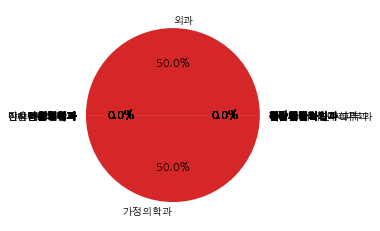

보유장비 : 
특수진료정보 : 
병원 이름 : 라인앤뷰의원
병원 종류 : 의원
전화 번호 : 02-1600-9833
주소 : 서울특별시 서대문구 신촌로 61 성현빌딩 2,3층 (창천동)
거리 : 0.2km


총 전문의 수 : 0명


<ipython-input-578-39005f58c555>:39: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(revdoc[code], labels=dfdoc['진료과목코드명'].unique(), autopct='%1.1f%%')


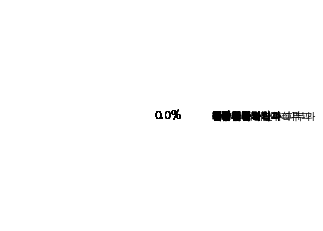

보유장비 : 
특수진료정보 : 
병원 이름 : 이에스의원
병원 종류 : 의원
전화 번호 : 02-334-1400
주소 : 서울특별시 서대문구 신촌로 67 (창천동, 거촌빌딩 6층)
거리 : 0.22km


총 전문의 수 : 0명


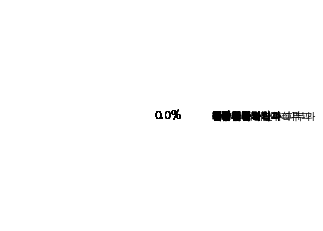

보유장비 : 
특수진료정보 : 
병원 이름 : 연세해맑은치과의원
병원 종류 : 치과의원
전화 번호 : 02-3143-2275
주소 : 서울특별시 서대문구 신촌로 67 5층 (창천동)
거리 : 0.22km


총 전문의 수 : 0명


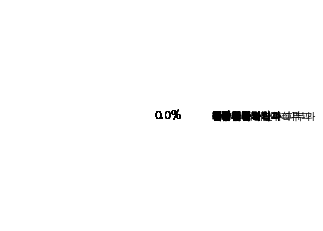

보유장비 : 콘빔CT
특수진료정보 : 측두하악관절 자극요법
병원 이름 : 케이씨에스서울김창수의원
병원 종류 : 의원
전화 번호 : 02-702-7531
주소 : 서울특별시 서대문구 신촌로 67 4층 (창천동, 거촌빌딩)
거리 : 0.22km


총 전문의 수 : 3명


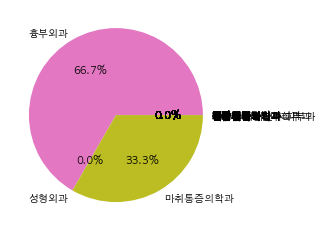

보유장비 : 초음파영상진단기
특수진료정보 : 정맥류수술
평일 09:00 - 17:30 사전예약 필수
토요일 09:00 - 12:30 둘째, 넷째주 휴무(사전예약 필수)
일요일 휴무
공휴일 휴무

소요시간 : 차량 1분(236m) / 도보 2분(160m)
가장 가까운 약국 : 파인약국(23.06m)


In [578]:
wantSubject = input('진료과를 입력하세요(ex:내과) : ')
i = 0
hosName = ''
hosCity = ''
hosAddress = ''
hosLatitude = ''
hosLongitude = ''
workingTime = ''
while 1:
    while 1:
        code = sorted_df.iloc[i,0]
        try:
            if wantSubject in candoc[code] :
                # 병원이름 출력
                hosName = sorted_df.iloc[i,1]
                hosCity = sorted_df.iloc[i,7]
                print('병원 이름 :', hosName) 
        
                # 병원 종류
                print('병원 종류 :', sorted_df.iloc[i,3])
                print('전화 번호 :', sorted_df.iloc[i,11])
            
                # 직선거리 출력
                hosAddress = sorted_df.iloc[i,10]
                print('주소 :', hosAddress)
                print('거리 : ' + str(df[df['암호화요양기호']==code].iloc[0,29].round(2)) + 'km')
                hosLatitude = df[df['암호화요양기호']==code].iloc[0,28]
                hosLongitude = df[df['암호화요양기호']==code].iloc[0,27]
            
                # 지도
                m = folium.Map(location = [latitude, longitude], zoom_start=16)
                folium.Marker([latitude, longitude], popup=address, tooltip='내 위치', icon=folium.Icon('red', icon='star')).add_to(m)
                folium.Marker([sorted_df.iloc[i,28], sorted_df.iloc[i,27]], popup=sorted_df.iloc[i,10], tooltip=sorted_df.iloc[i,1]).add_to(m)
                display(m)
            
                # 전문의 수 + 그래프
                print('총 전문의 수 : ' + str(newdoc.loc[code, '총의사수']) + '명')
                fig, ax = plt.subplots(nrows=1, ncols=1)
                plt.pie(revdoc[code], labels=dfdoc['진료과목코드명'].unique(), autopct='%1.1f%%')
                plt.show()
            
                # 장비, 특수진료정보
                deviceList = dfDevice[dfDevice['암호화요양기호']==code]['장비코드명'].tolist()
                device = ''
                for k in range(len(deviceList)):
                    device += (deviceList[k]+', ') # 문자열로 이쁘게 출력하려고 난리치는 중
                print('보유장비 :',device[:-2])
                treatmentList = dfTreatment[dfTreatment['암호화요양기호']==code]['검색코드명'].tolist()
                treatment = ''
                for k in range(len(treatmentList)):
                    treatment += (treatmentList[k]+', ')
                print('특수진료정보 :', treatment[:-2])
            
                print('=' * 100)
                break
        except:pass
        i += 1
    if input('더 이상 검색을 멈추시겠습니까?(y / n) : ') == 'y' : break
    i += 1


# 크롤링
driver = webdriver.Chrome(service = Service('./chromedriver'))
driver.maximize_window()
driver.get('http://map.naver.com/v5/search')
driver.implicitly_wait(10) # <->explicitly_wait()

search_box = driver.find_element(By.CSS_SELECTOR, 'div.input_box>input.input_search')
hosAddress = hosAddress.split(' ')
hosAddress = hosAddress[:-1]
hosAddress = ' '.join(hosAddress)
search_box.send_keys(hosAddress)
search_box.send_keys(Keys.ENTER)
driver.implicitly_wait(10)

start_button = driver.find_element(By.CSS_SELECTOR, 'div.btn_area > div.btn_box.direction > button.btn.btn_goal')
start_button.click()
driver.implicitly_wait(10)

destination_box = driver.find_element(By.CSS_SELECTOR, 'div.input_box>input.directions-search-input-el.input_search')
destination_box.send_keys(address)
destination_box.send_keys(Keys.ENTER)
time.sleep(1.5)

car_button = driver.find_element(By.CSS_SELECTOR, 'div > directions-layout > directions-result > div.main > div > ul > li:nth-child(2) > a')
car_button.click()
time.sleep(1.5)
timeCar = driver.find_element(By.CSS_SELECTOR, 'div > ul > li:nth-child(1) > directions-summary-item-car > directions-summary-item-car-card > div.route_summary_box > div:nth-child(2) > strong').text
distanceCar = driver.find_element(By.CSS_SELECTOR, 'div > ul > li:nth-child(1) > directions-summary-item-car > directions-summary-item-car-card > div.route_summary_box > div:nth-child(2) > span > readable-distance').text

walk_button = driver.find_element(By.CSS_SELECTOR, 'div > directions-layout > directions-result > div.main > div > ul > li:nth-child(3) > a')
walk_button.click()
time.sleep(1.5)
timeWalk = driver.find_element(By.CSS_SELECTOR, 'div > ul > li:nth-child(1) > directions-summary-item-walking > div.summary_box > strong > readable-duration').text
distanceWalk = driver.find_element(By.CSS_SELECTOR, 'div > ul > li:nth-child(1) > directions-summary-item-walking > div.summary_box > span.summary_text > readable-distance').text

home_button = driver.find_element(By.CSS_SELECTOR, 'div > div.ps-content > div > ul > li:nth-child(1) > a')
home_button.click()
driver.implicitly_wait(10)

input_box = driver.find_element(By.CSS_SELECTOR, 'div.input_box>input.input_search')
input_box.send_keys(hosCity+' '+hosName)
input_box.send_keys(Keys.ENTER)

driver.implicitly_wait(10)
driver.switch_to.frame('searchIframe') # iframe

try:
    hosName_button = driver.find_element(By.CSS_SELECTOR, 'ul > li:nth-child(1) > div._3ZU00._1rBq3 > a:nth-child(1)')
    hosName_button.click()
    driver.implicitly_wait(10)
except:pass

driver.implicitly_wait(10)
# driver.switch_to.window(driver.window_handles[0])     # < 확실하지 않지만 탭을 다시 지정함으로써 프레임에서 탈출 시켜주는거 같음;;;
driver.switch_to.default_content()                      # < 이게 프레임 탈출하는 코드임!!!!
driver.switch_to.frame('entryIframe')
try:
    open_button = driver.find_element(By.CSS_SELECTOR, 'div > ul > li.Cqsis._1X-CS > div > a')
    open_button.click()
    time.sleep(1.5)
    workingTime = driver.find_element(By.CSS_SELECTOR, 'div > ul > li.Cqsis._1X-CS > div > a._318hN._2y4j9._1qcGX').text.split('\n')
    workingTime.remove('펼쳐보기')
    workingTime.remove('접기')
    try:workingTime.remove('에 진료 시작')
    except:pass
    workingTime = '\n'.join(workingTime)
except:pass
driver.close()

# 가까운 약국, 주소 출력
dfPharmacy = pd.read_csv('./hos/2. 약국정보서비스 2021.12.csv', encoding='CP949')
dfPharmacy = dfPharmacy[dfPharmacy['y좌표'].notnull()]
distanceList_phar = []
for i in range(len(dfPharmacy)):
    distanceList_phar.append(haversine((hosLatitude, hosLongitude), (dfPharmacy.iloc[i]['y좌표'], dfPharmacy.iloc[i]['x좌표']), unit='m'))
dfPharmacy['hos-phar distance'] = distanceList_phar
sorted_dfPharmacy = dfPharmacy.sort_values(by='hos-phar distance')
pharmacyName = sorted_dfPharmacy.iloc[0,1]
dis = sorted_dfPharmacy.iloc[0,15].round(2)


print(workingTime)
print(f'\n소요시간 : 차량 {timeCar}({distanceCar}) / 도보 {timeWalk}({distanceWalk})')
print(f'가장 가까운 약국 : {pharmacyName}({dis}m)')